In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [9]:
df = pd.read_csv("./Consumption.csv")
df.head()


,MODEL_YEAR,MAKE,MODEL,VEHICLE_CLASS,ENGINE_SIZE(L),CYLINDERS,TRANSMISSION,FUEL_TYPE,FUEL_CONSUMPTION_CITY(L/100km),HWY_(L/100km),COMB_(L/100km),COMB_(mpg),CO2_EMISSIONS(g/km)
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,9.2,6.7,8.1,35,186
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,8.5,6.5,7.6,37,175
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,12.2,7.4,10.0,28,230
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,13.4,9.2,11.5,25,264
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,10.0,7.0,8.6,33,198


In [10]:
df.describe()

,MODEL_YEAR,ENGINE_SIZE(L),CYLINDERS,FUEL_CONSUMPTION_CITY(L/100km),HWY_(L/100km),COMB_(L/100km),COMB_(mpg),CO2_EMISSIONS(g/km)
count,14343.000000,14343.000000,14343.000000,14343.000000,14343.000000,14343.000000,14343.000000,14343.000000
mean,2007.623022,3.474308,5.989054,12.914279,8.815708,11.071512,27.353483,248.530782
std,4.140223,1.310875,1.776277,3.549669,2.344114,2.976739,7.503766,59.144102
min,2000.000000,0.800000,2.000000,3.500000,3.200000,3.600000,11.000000,83.000000
25%,2004.000000,2.400000,4.000000,10.600000,7.200000,9.100000,22.000000,209.000000
50%,2008.000000,3.400000,6.000000,12.400000,8.300000,10.500000,27.000000,239.000000
75%,2011.000000,4.300000,8.000000,14.900000,10.200000,12.800000,31.000000,285.000000
max,2014.000000,8.400000,16.000000,30.600000,19.000000,24.800000,78.000000,570.000000


In [12]:
cdf = df[['ENGINE_SIZE(L)','CYLINDERS','FUEL_CONSUMPTION_CITY(L/100km)','CO2_EMISSIONS(g/km)']]
cdf.head(9)

,ENGINE_SIZE(L),CYLINDERS,FUEL_CONSUMPTION_CITY(L/100km),CO2_EMISSIONS(g/km)
0,1.6,4,9.2,186
1,1.6,4,8.5,175
2,3.2,6,12.2,230
3,3.5,6,13.4,264
4,1.8,4,10.0,198
5,1.8,4,9.3,189
6,1.8,4,9.4,191
7,3.0,6,13.6,267
8,3.2,6,13.8,269


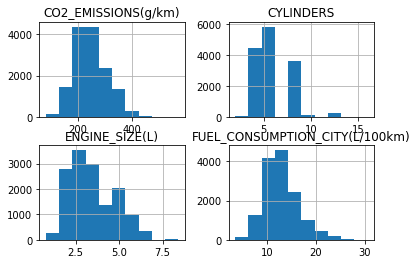

In [13]:
viz = cdf[['CYLINDERS','ENGINE_SIZE(L)','CO2_EMISSIONS(g/km)','FUEL_CONSUMPTION_CITY(L/100km)']]
viz.hist()
plt.show()

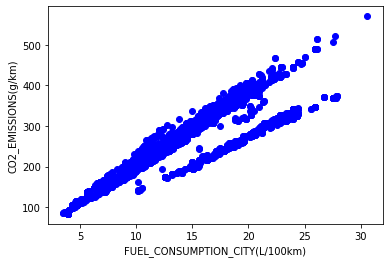

In [19]:
plt.scatter(cdf['FUEL_CONSUMPTION_CITY(L/100km)'],cdf['CO2_EMISSIONS(g/km)' ],color='blue')
plt.xlabel("FUEL_CONSUMPTION_CITY(L/100km)")
plt.ylabel("CO2_EMISSIONS(g/km)")
plt.show()

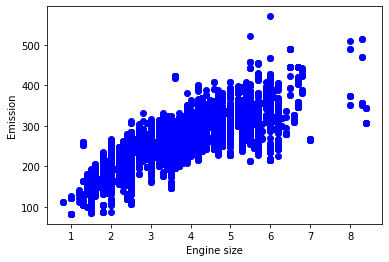

In [21]:
plt.scatter(cdf['ENGINE_SIZE(L)'], cdf['CO2_EMISSIONS(g/km)'],  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [22]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

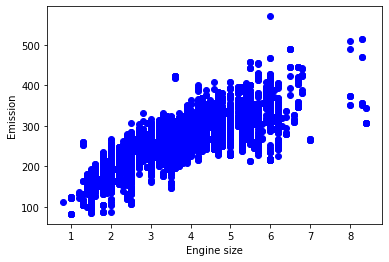

In [27]:
plt.scatter(train['ENGINE_SIZE(L)'], train['CO2_EMISSIONS(g/km)'],  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [28]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINE_SIZE(L)','CYLINDERS','FUEL_CONSUMPTION_CITY(L/100km)']])
y = np.asanyarray(train[['CO2_EMISSIONS(g/km)']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[ 7.14577958  3.05377012 11.89651392]]


In [29]:
y_hat= regr.predict(test[['ENGINE_SIZE(L)','CYLINDERS','FUEL_CONSUMPTION_CITY(L/100km)']])
x = np.asanyarray(test[['ENGINE_SIZE(L)','CYLINDERS','FUEL_CONSUMPTION_CITY(L/100km)']])
y = np.asanyarray(test[['CO2_EMISSIONS(g/km)']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

#variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 491.43
Variance score: 0.86
